In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")

In [201]:
housing = pd.read_csv("housing.csv")
housing.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [202]:
housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [203]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [204]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [205]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [206]:
## checking for missing values
missing_values = housing.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [207]:
### checking for categorical variables 
categorical = housing.select_dtypes(include = ["object"])
categorical.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [208]:
## checking for the total number of guestrooms
categorical["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [209]:
## checking for the total number of basement
categorical["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [210]:
# checking for the total number of hotwaterheating
categorical["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [211]:
# checking for the total number of airconditioning
categorical["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [212]:
## checking for the continuous data 

continuous = housing.select_dtypes(include = ["float64", "int64"])
continuous.head(6)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
5,10850000,7500,3,3,1,2


In [213]:
continuous.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [214]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(housing.isnull().sum())

# Encode categorical variables
housing_encoded = pd.get_dummies(housing, drop_first=True)

# Normalize numerical features

scaler = StandardScaler()
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing_encoded[numerical_features] = scaler.fit_transform(housing_encoded[numerical_features])

housing_encoded.head()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,True,False,False,False,True,True,False,False
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,True,False,False,False,True,False,False,False
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,True,False,True,False,False,True,True,False
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,True,False,True,False,True,True,False,False
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,False,False,False


### Checking for the outiers and data visualization

### Checking for data distribution

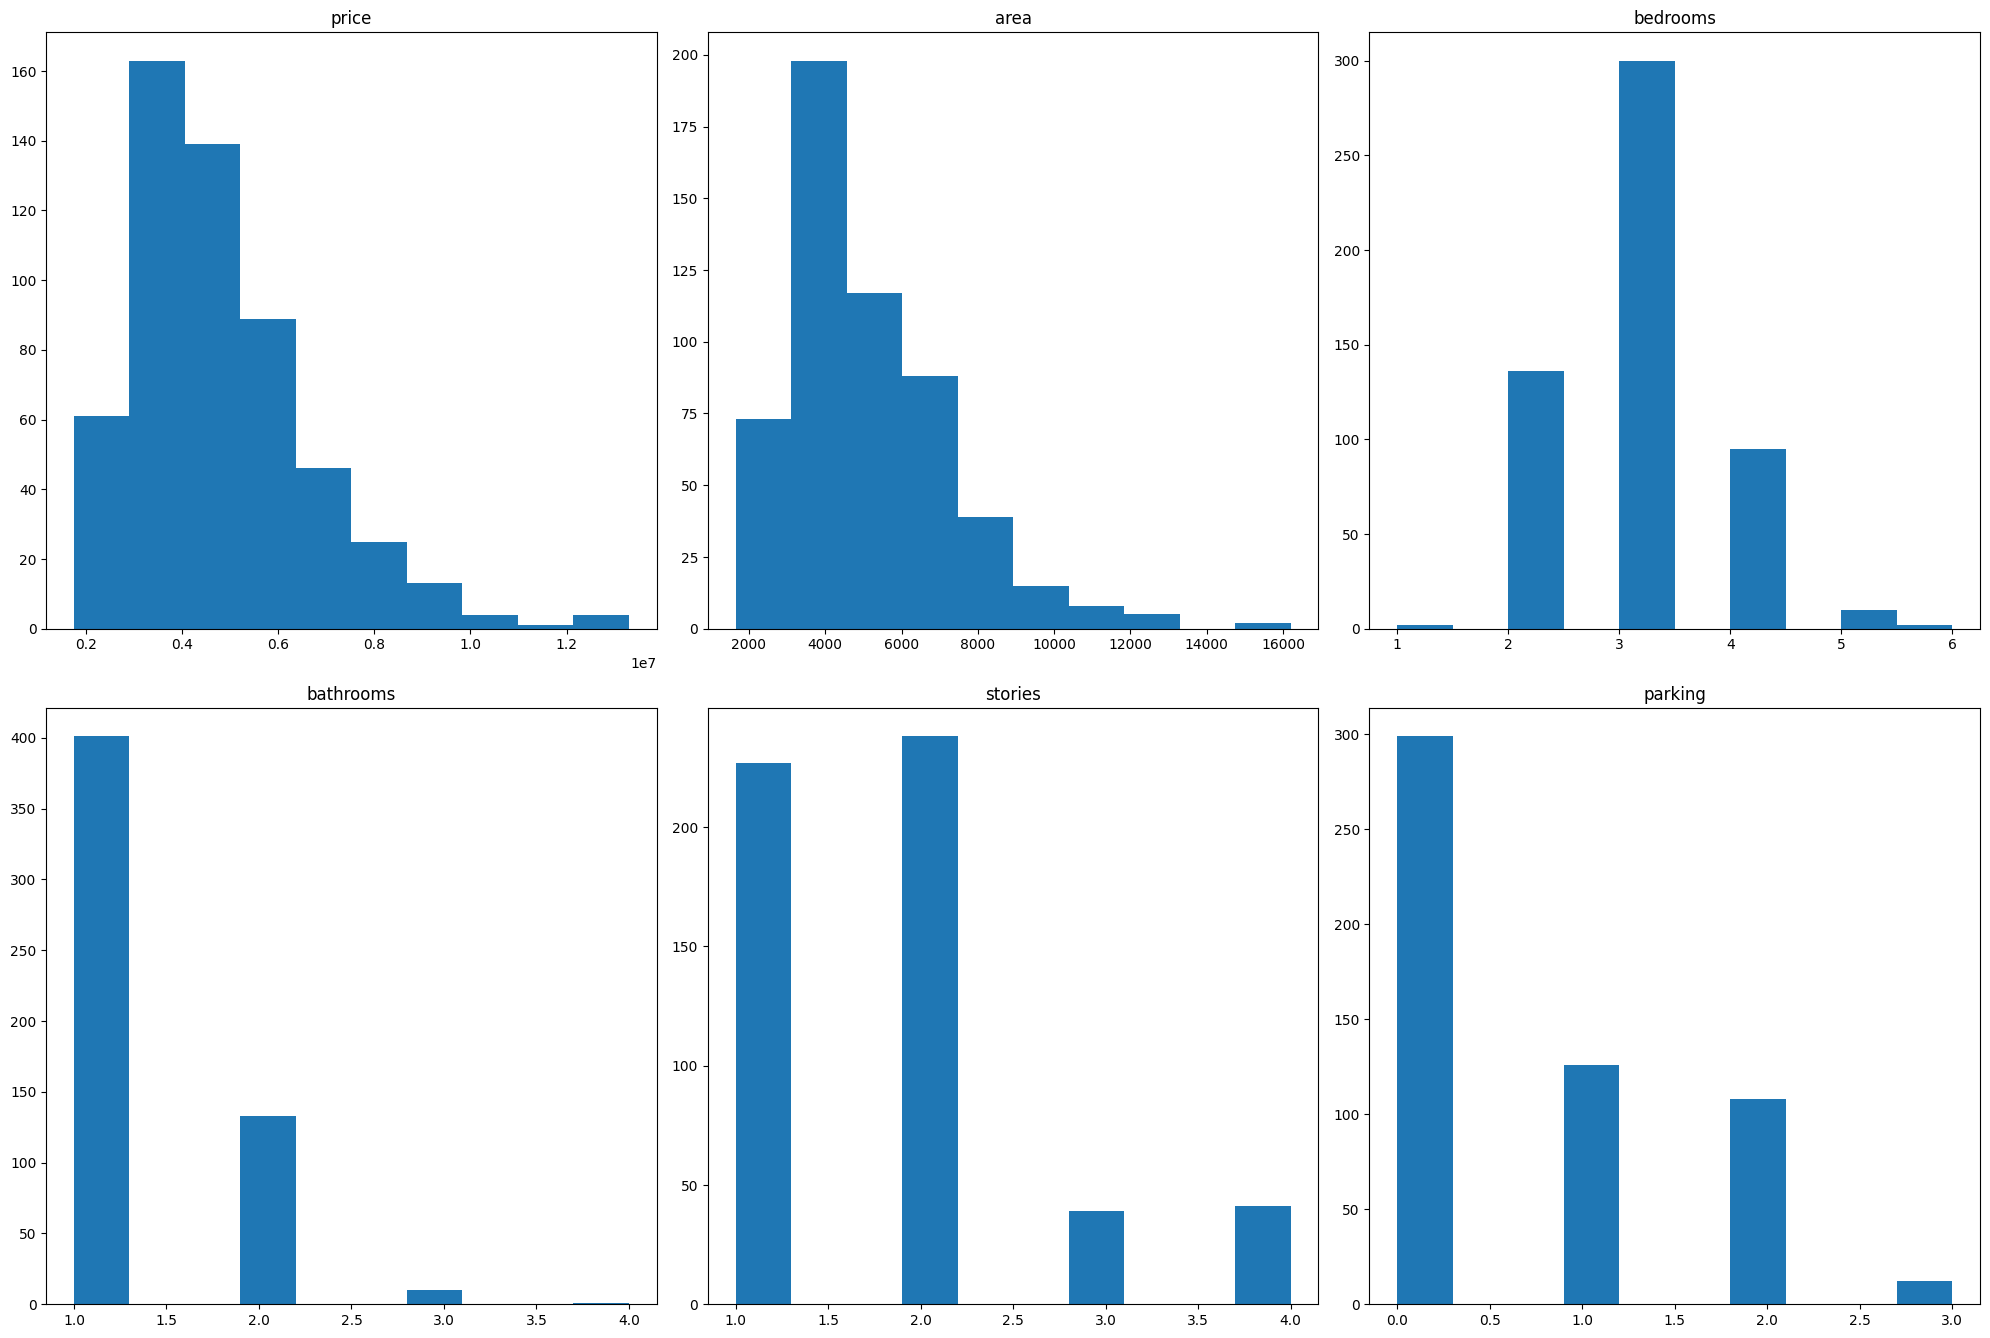

In [215]:
###checking for outliers using boxplot 
plt.figure(figsize=(20,20))
for i,col in enumerate(continuous.columns):
    plt.subplot(3,3, i+1)
    plt.hist(housing[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [216]:
def box_plotting(continuous):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(continuous.columns):
        plt.subplot(3,3, i+1)
        plt.boxplot(housing[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()



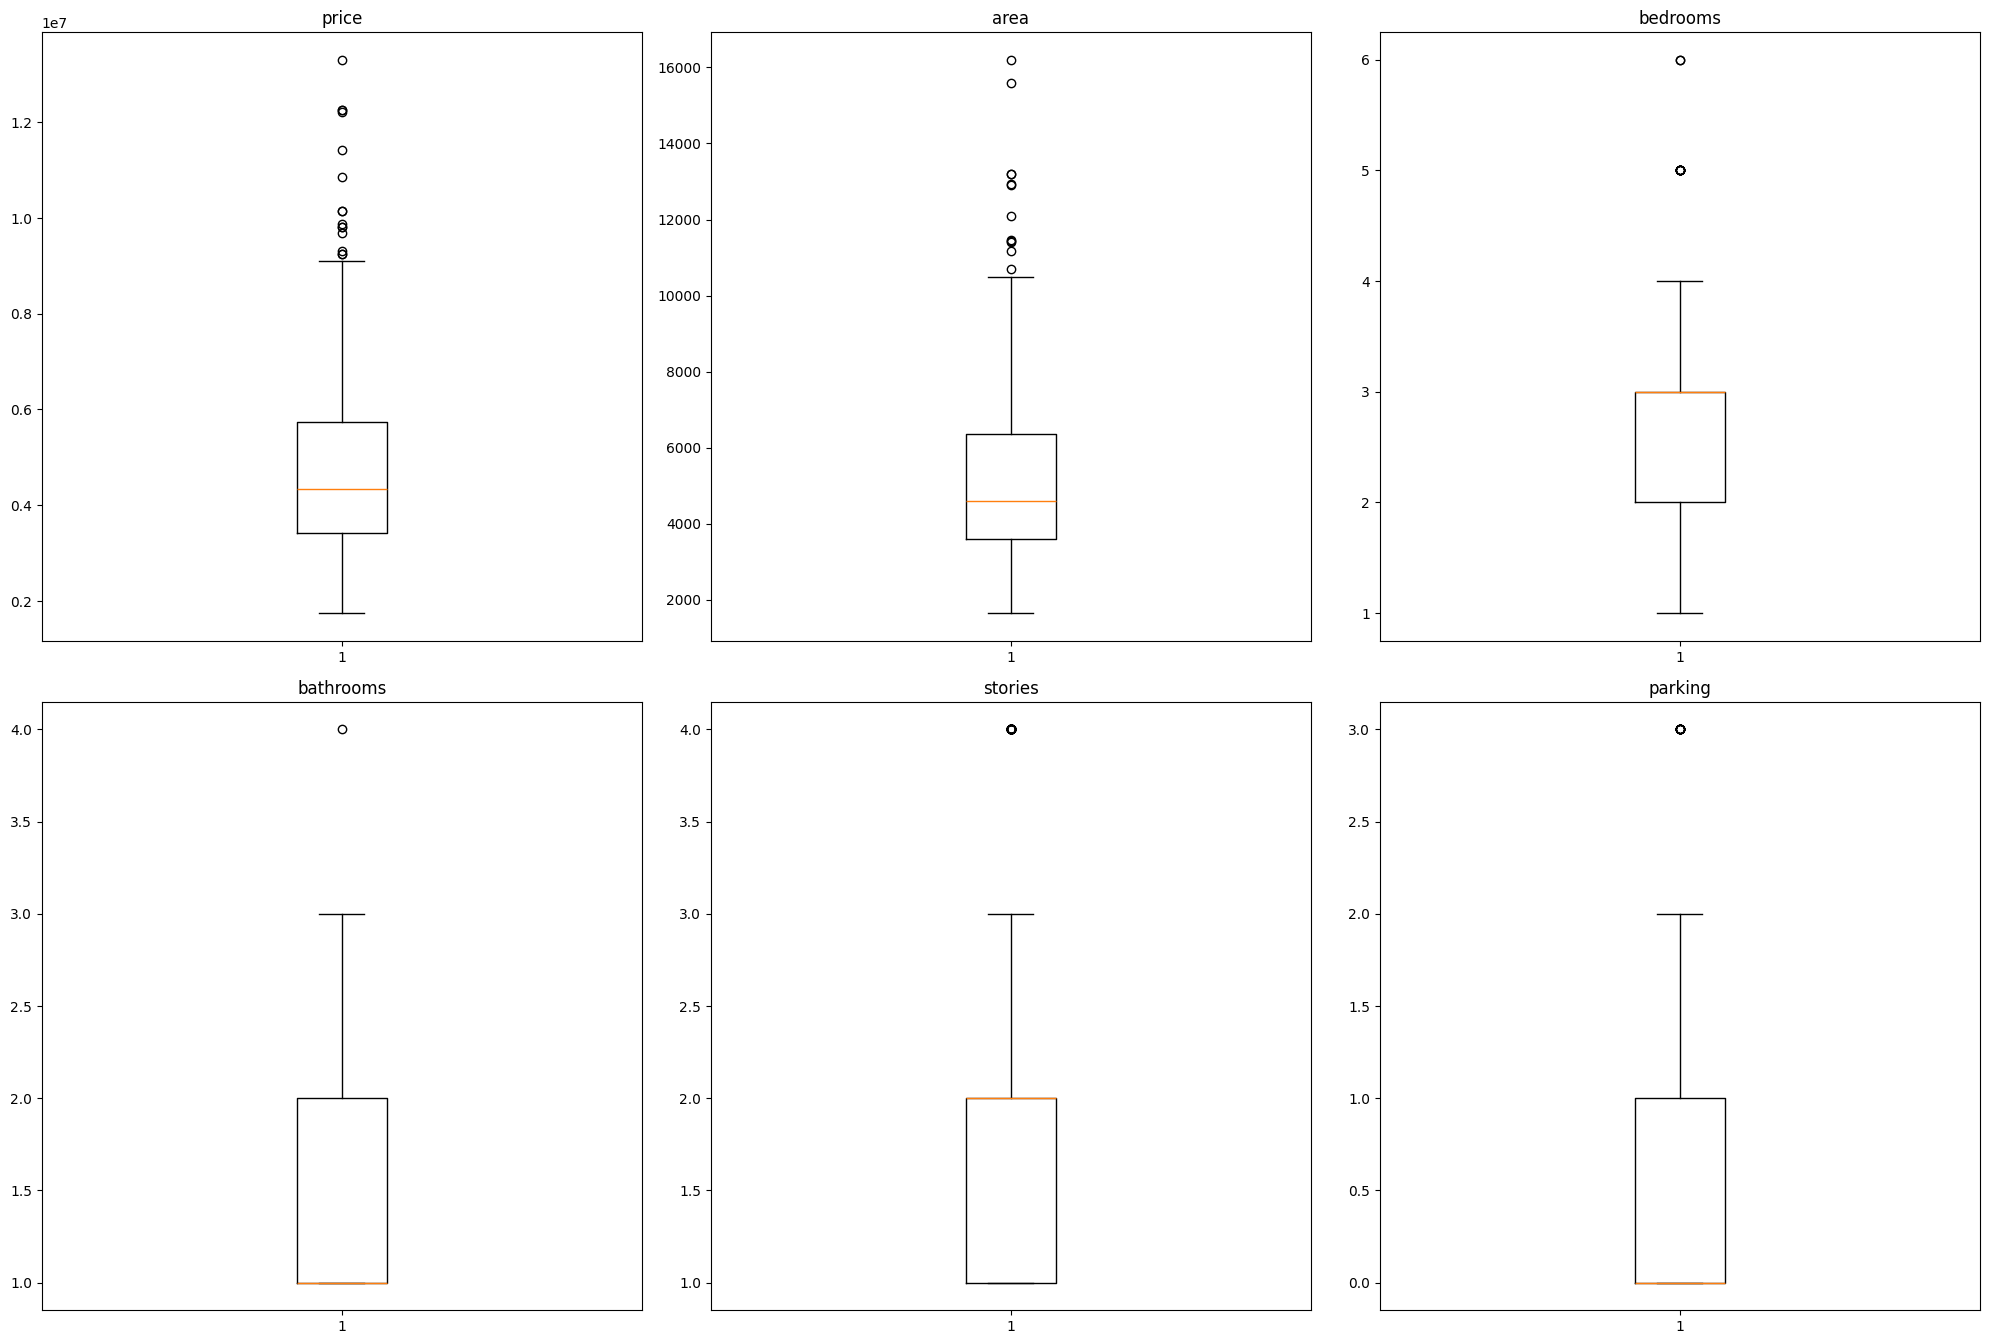

In [217]:
box_plotting(continuous)

In [218]:
### removing outlier using iqr
def outlier_remove(columns):
    for i in columns:
        
        lower_quantile = housing[i].quantile(.25)
        upper_quantile = housing[i].quantile(.75)
        
        
        IQR  = upper_quantile-lower_quantile
        
        upper_boundary = upper_quantile + 1.5 * IQR
        lower_boundary = lower_quantile - 1.5*IQR
        
        housing[i] = np.where(housing[i]>upper_boundary, upper_boundary, housing[i])
        housing[i] = np.where(housing[i]<lower_boundary, lower_boundary, housing[i])
    


In [219]:
outlier_remove(continuous.columns)

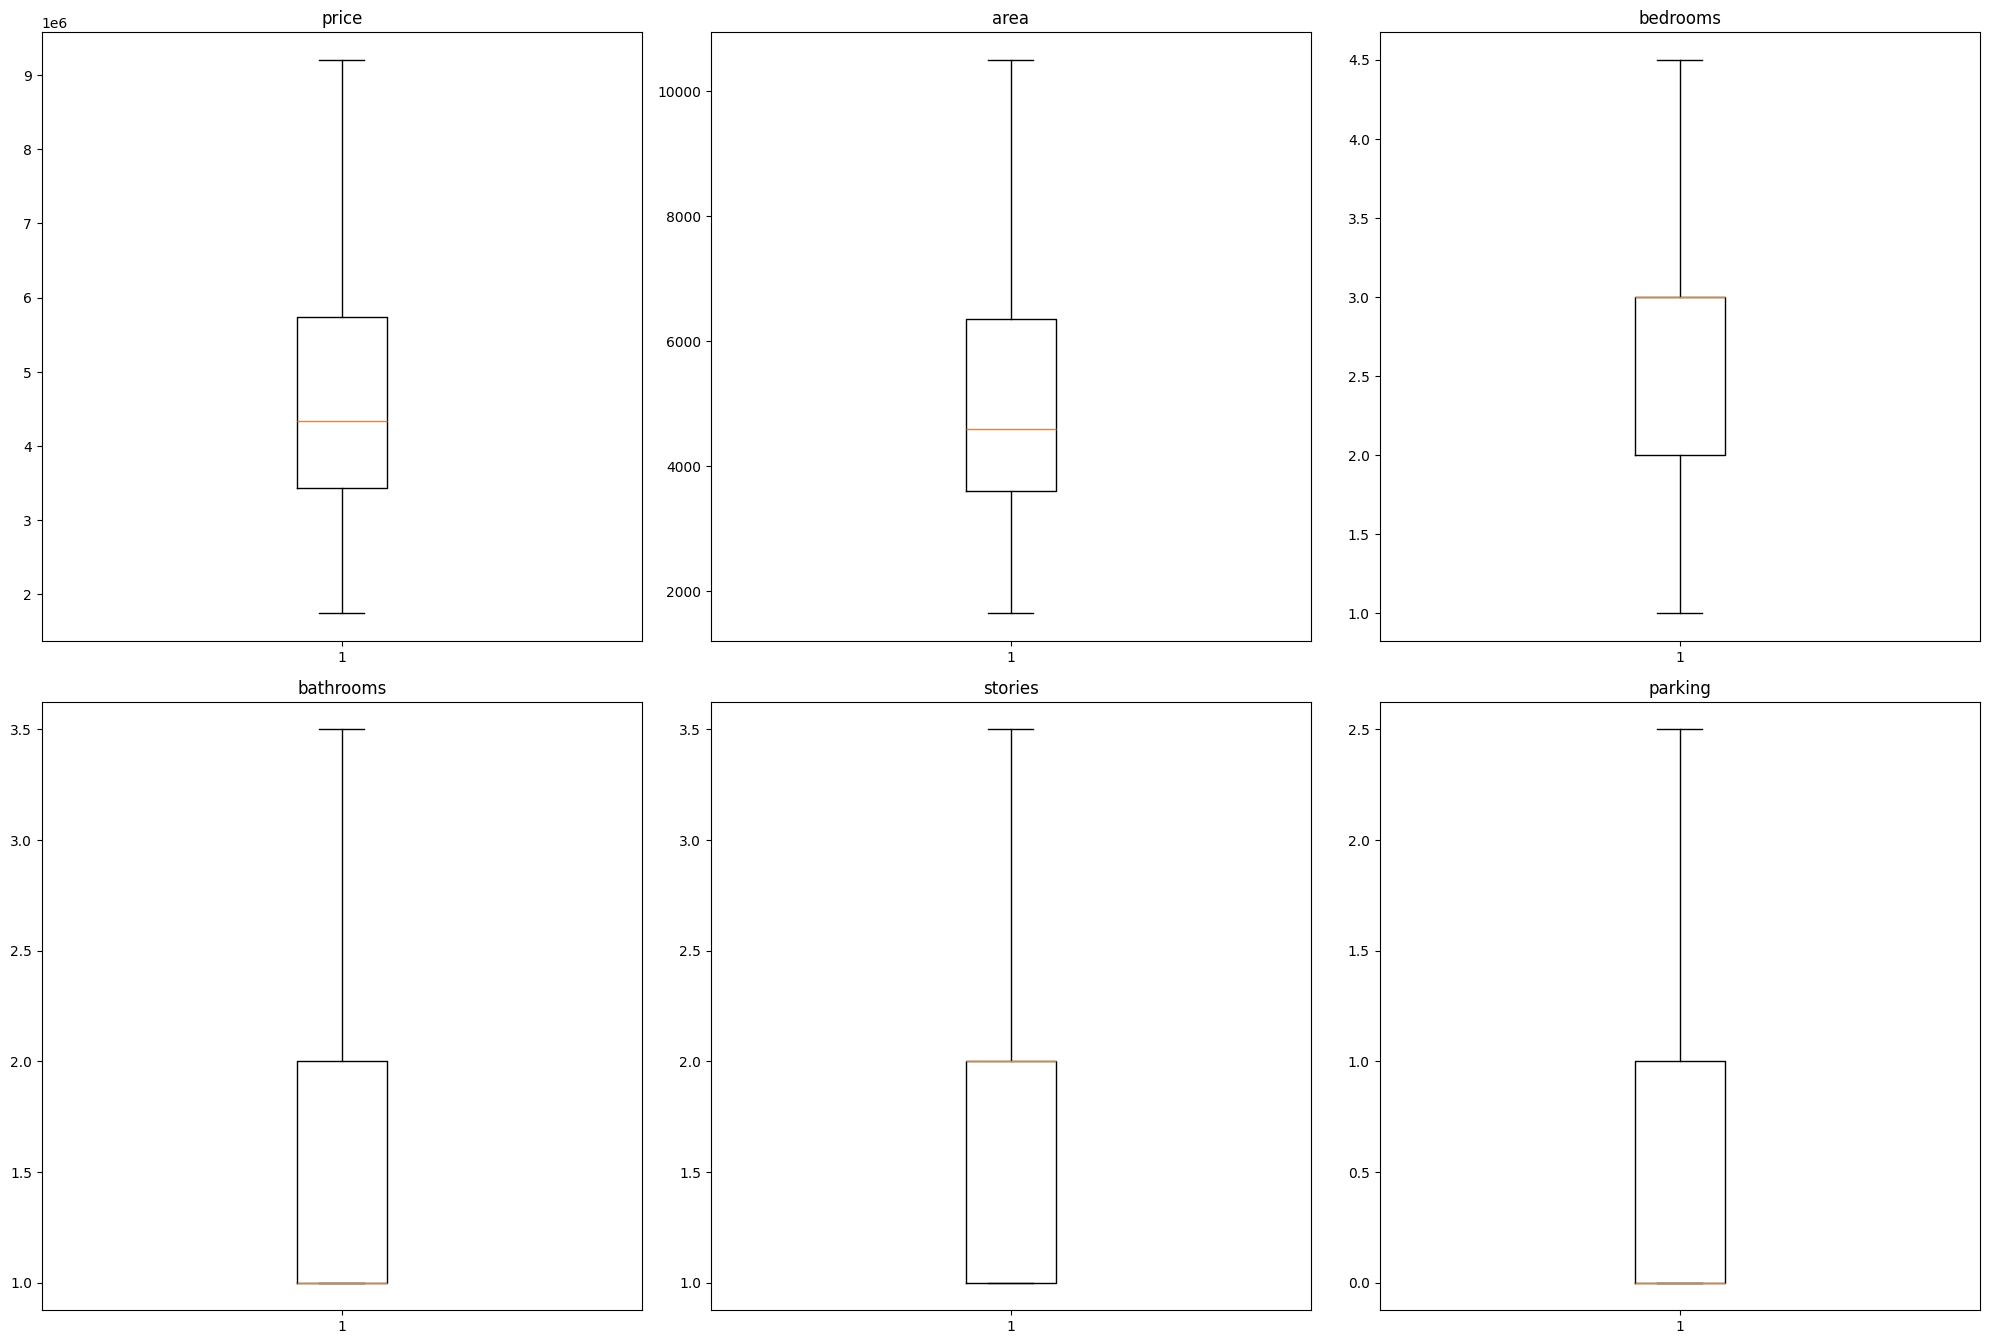

In [220]:
box_plotting(continuous)

In [221]:
def removing_outliers(columns):
    for i in columns:

        lower_quantile = housing[i].quantile(.25)
        upper_quantile = housing[i].quantile(.75)

        IQR  = upper_quantile-lower_quantile

        upper_boundary = upper_quantile + 1.5 * IQR
        lower_boundary = lower_quantile - 1.5 * IQR

        housing[i] = np.where(housing[i]>upper_boundary, upper_boundary, housing[i])
        housing[i] = np.where(housing[i]<lower_boundary, lower_boundary, housing[i])

In [222]:
removing_outliers(continuous.columns)


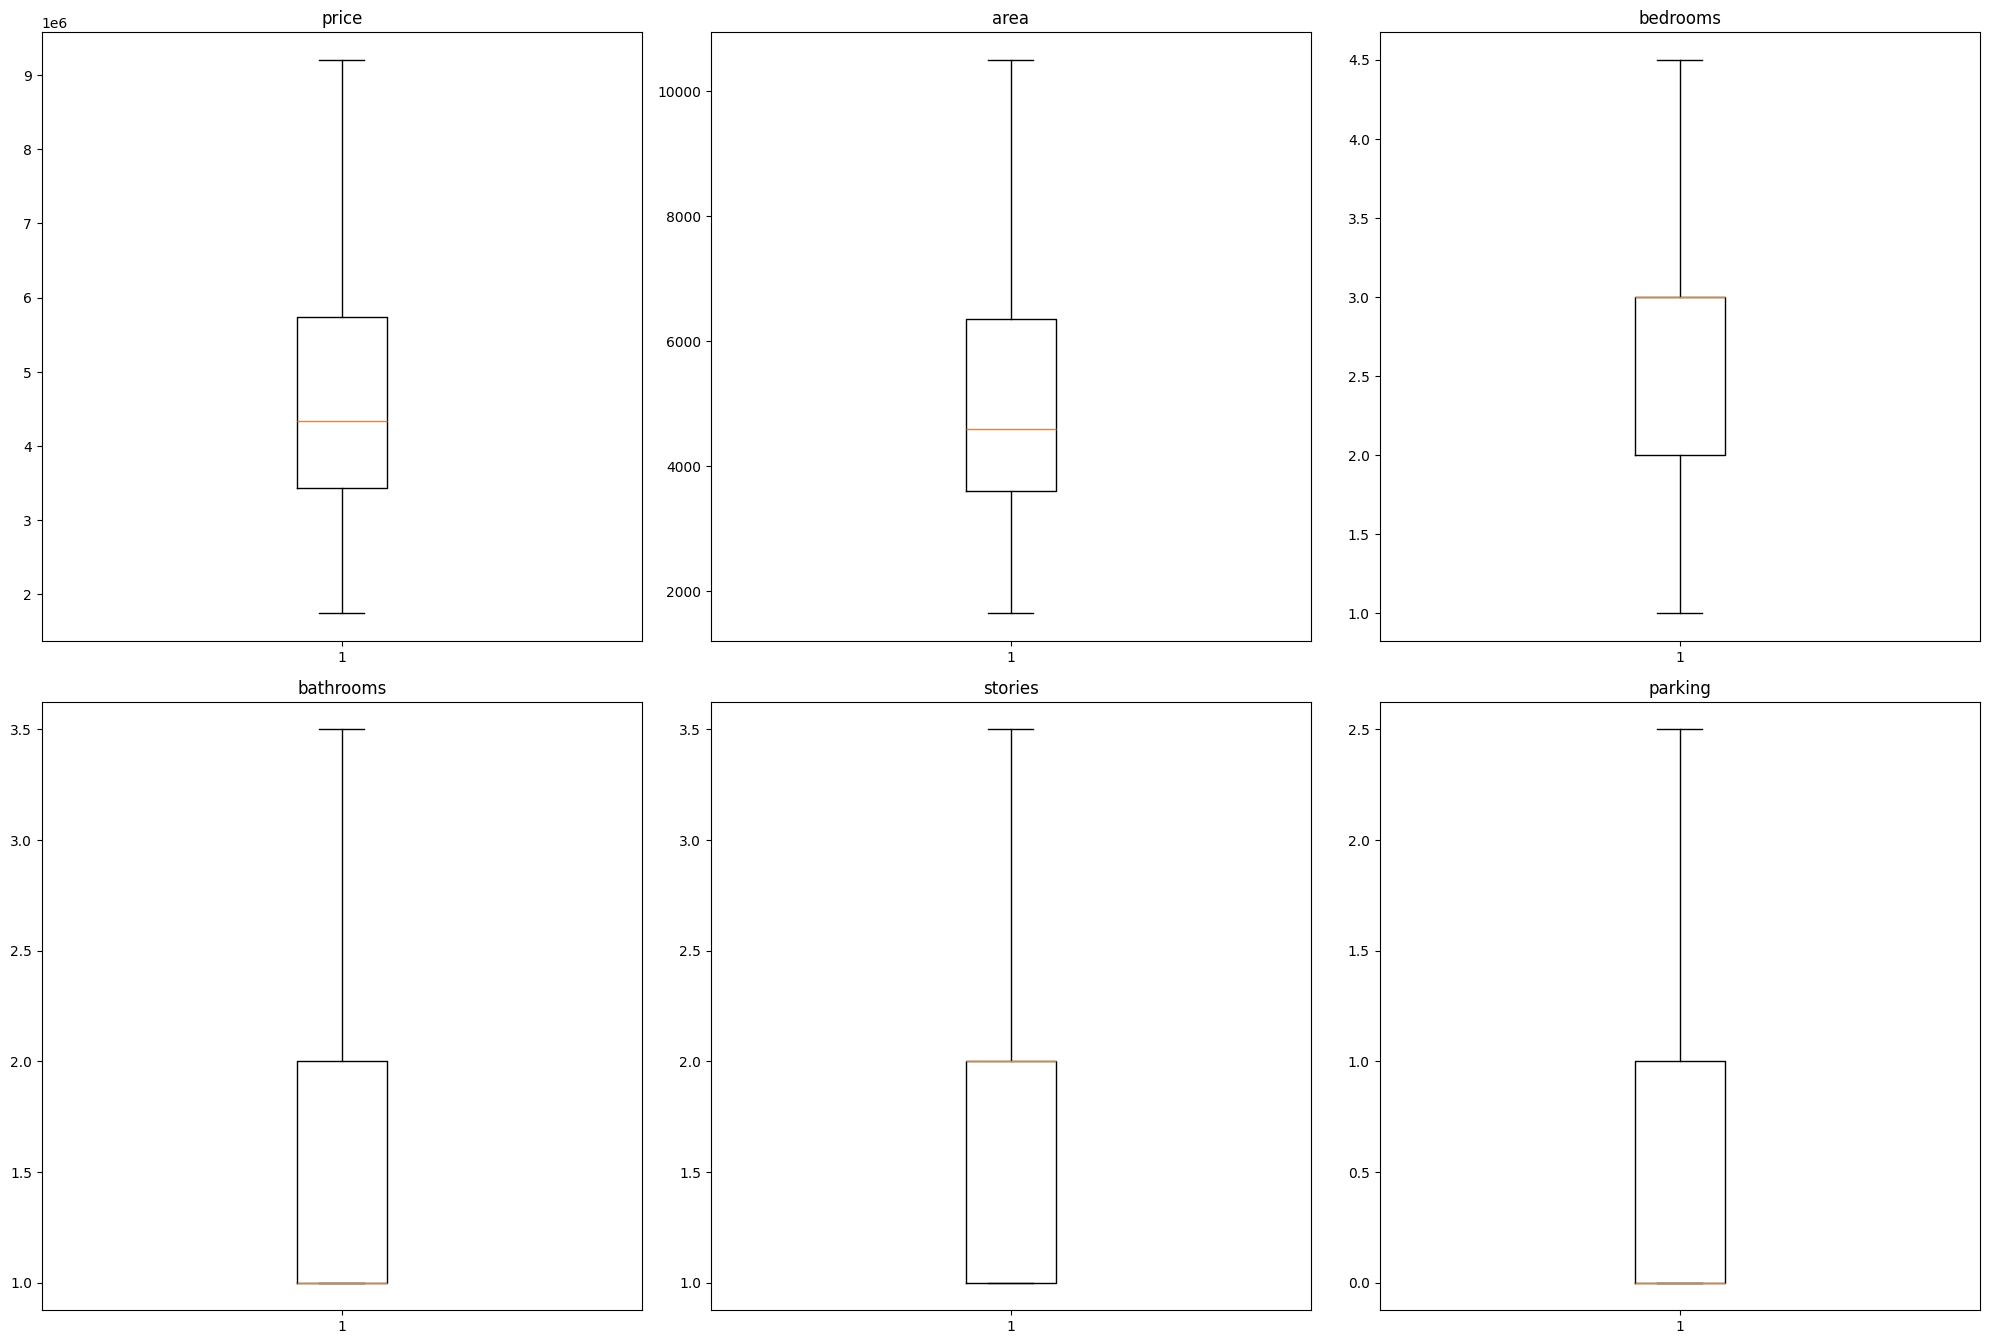

In [223]:
box_plotting(continuous)

## Relationships (target = price)
- continuous vs continuous

In [224]:
continuous.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [225]:
categorical.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

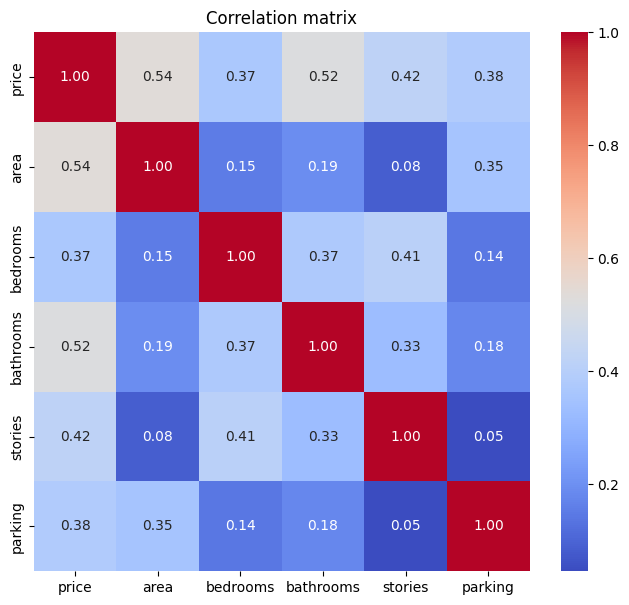

In [226]:
corr_matrix = continuous.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm' , fmt = ".2f")
plt.title("Correlation matrix")
plt.show()

In [227]:


def scatterplot(housing, continuous_columns):
    fig, axes = plt.subplots(2, 3, figsize=(14, 10))  # grid
    axes = axes.flatten()  # Flatten for easy indexing

    for i, col in enumerate(continuous_columns):
        sns.scatterplot(x=housing[col], y=housing["price"], ax=axes[i])
        axes[i].set_title(f"Price vs {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Price")

    plt.tight_layout()  
    plt.show()




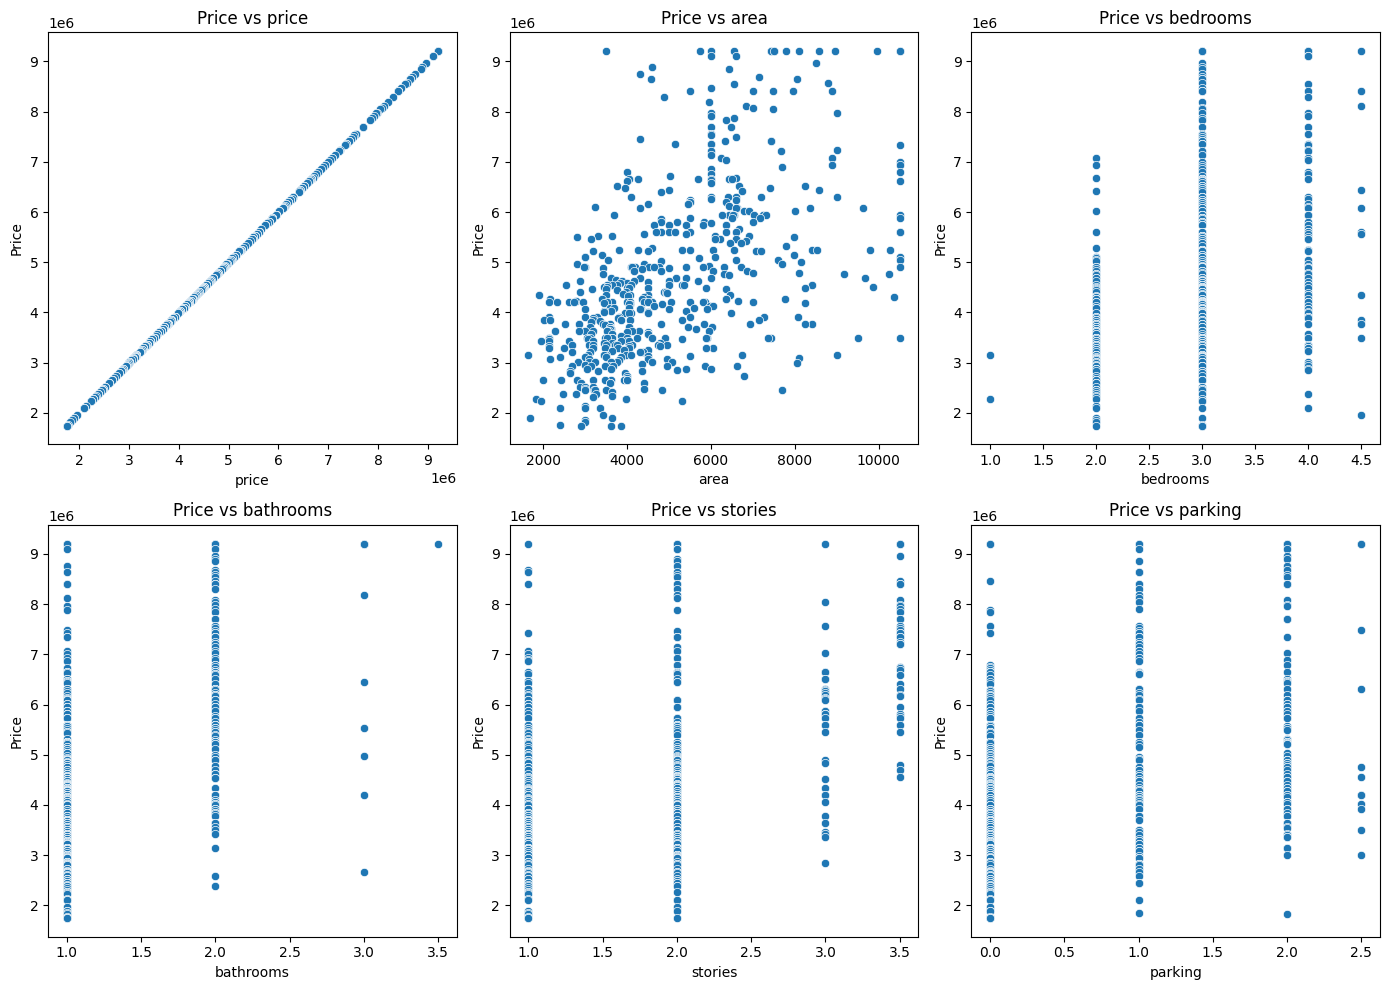

In [228]:

continuous_columns = ['price','area','bedrooms','bathrooms','stories', 'parking']
scatterplot(housing, continuous)

the correlated predictors in continous columns is [area]

In [229]:
def combined_boxplots(data, var1, var2):
    sns.boxplot(x = data[var1], y = data[var2])
    plt.xlabel(f"{var1}")
    plt.ylabel(f"{var2}")
    plt.title(f"Boxplot for {var1} vs. {var2}")
    plt.show()

def AnovaTest(data, cont_var, cat_var):
    group_data = [
        group[cont_var].values for _, group in data.groupby(cat_var)
    ]
    f_statistics, p_value = f_oneway(*group_data)
    if p_value > 0.05:
        print(f"{cat_var} is not correlated with {cont_var}")
    elif p_value < 0.05:
        print(f"{cat_var} is correlated with {cont_var}")

- grouping for cat columns


In [230]:
categorical_columns = []
categorical_columns = categorical.columns 


In [231]:
categorical_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

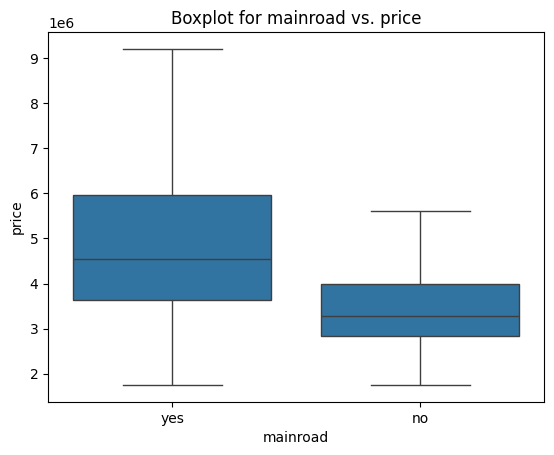

mainroad is correlated with price


<Figure size 640x480 with 0 Axes>

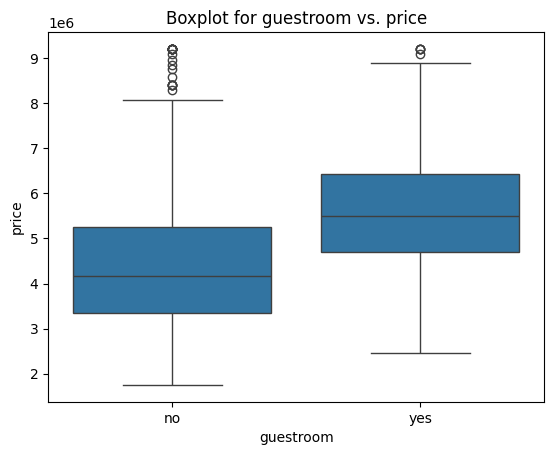

guestroom is correlated with price


<Figure size 640x480 with 0 Axes>

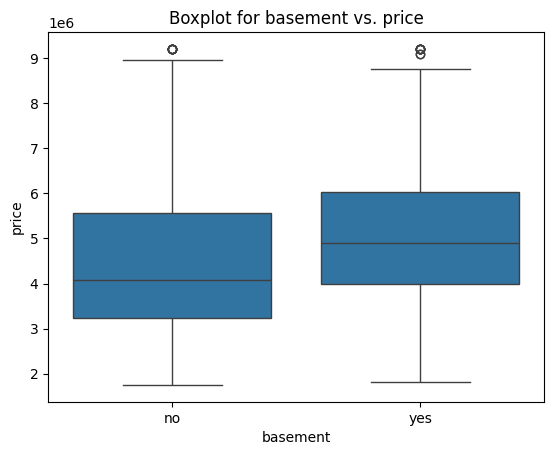

basement is correlated with price


<Figure size 640x480 with 0 Axes>

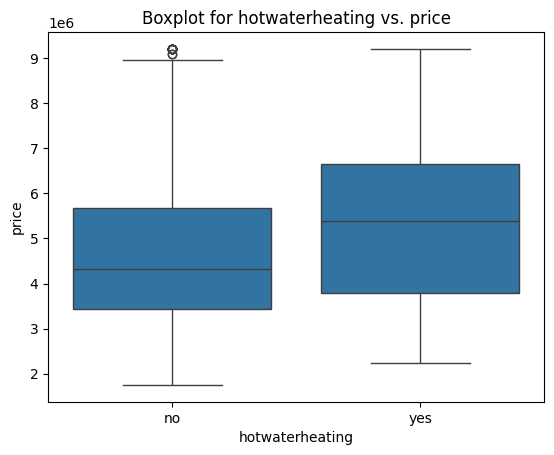

hotwaterheating is correlated with price


<Figure size 640x480 with 0 Axes>

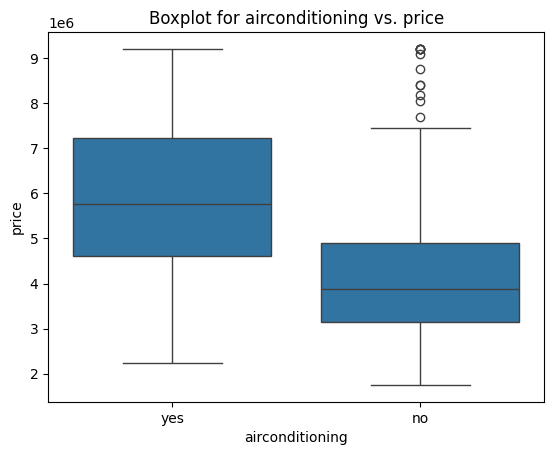

airconditioning is correlated with price


<Figure size 640x480 with 0 Axes>

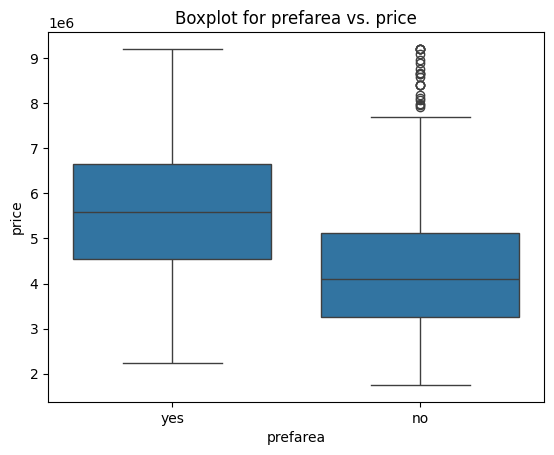

prefarea is correlated with price


<Figure size 640x480 with 0 Axes>

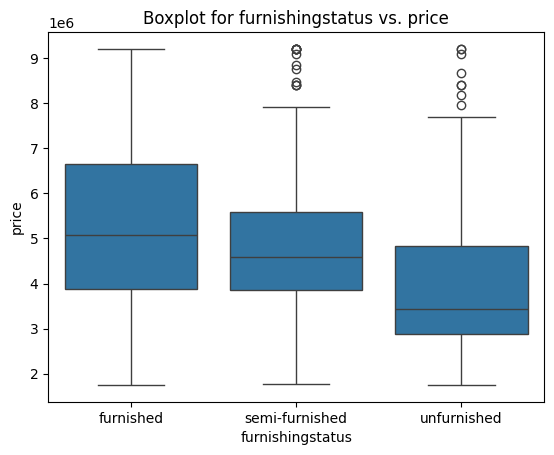

furnishingstatus is correlated with price


<Figure size 640x480 with 0 Axes>

In [232]:
for i in categorical_columns:
    combined_boxplots(housing, i, "price")
    AnovaTest(housing, "price", i)
    plt.tight_layout()
    plt.show()